## **Telco Customer Churn Analysis**


### **Business Understanding**

##### **Problem Statement**
Customer retention is at the heart of most business models in their effort to increase their profit or revenue margin. Presently, most companies leverage machine learning to build classification models to perform churn analysis on their customers. The highly competitive nature of the telecommunications industry makes retaining customers extremely crucial. This project involves accessing and analyzing customer churn data from multiple sources, building a robust classification model, and helping a telecommunication company predict customer churn to improve retention strategies. The objective is to help a telecommunication company understand customer churn and its impact on profitability. 

##### **Goal and Objectives**

•    To understand the current customer churn rate.

•    To identify factors (such as demographics, usage patterns, etc.) that influence customer churn aiming to gain a deeper understanding of customer behavior

•    To build a predictive machine learning model to predict customer churn for a telecommunications company to forecast which customers are likely to churn

##### **Stakeholders**
•	Company Executives and Management

•	Data Science and Analytics Team

•	Customer Service and Support Teams

•	Marketing and Sales and Advertisement Teams:

•	Finance 

•	Legal and Compliance Team

##### **Key Metrics and Success Criteria**

•  Accuracy Requirement:

•	This model must achieve an accuracy score of at least 85% when evaluated on balanced data, ensuring a high proportion of correct predictions.
•  F1 Score Benchmark

•	Models should attain an F1 score greater than 0.80 (80%), indicating a strong balance between precision and recall, which is crucial for handling both false positives and false negatives effectively.

•  ROC Curve Standard:

•	An ROC curve with an area under the curve (AUC) of 80% is desired, demonstrating the model's ability to generalize well and maintain a good balance between sensitivity and specificity.

•  Baseline Models Requirement:

•	At least four different baseline models should be developed to serve as benchmarks. These could include logistic regression, decision trees, support vector machines, and k-nearest neighbors, providing a range of reference points for comparison.

•  Hyperparameter Tuning Condition:

Hyperparameter tuning will be conducted only on those baseline models that achieve an F1 score above the 0.80 threshold. This ensures that tuning efforts are concentrated on models that show initial promise and meet the performance criteria.


##### **Hypothesis**

- Null Hypothesis (Ho):There is a no significant relationship between the total amount charged to a customer and their likelihood of churning.
    
- Alternative Hypothesis (H1):- There is a significant relationship between the total amount charged to a customer and their likelihood of churning


##### **Analytical Questions**
I. What is the overall churn rate against contract types (Month-to-month, One-year, Two-year)?

- As part of our goals we would like to understand the overall churn rate. These metrics are crucial for understanding customer retention patterns based on contract duration. 

II. What are the key demographic and behavioral characteristics of customers who churn compared to those who stay, and how do these  characteristics vary across different customer segments?

- Insights derived can include whether certain age groups or regions are more prone to churn, or if specific behaviours influence higher churn rates. 

III. Which factors have the highest influence on customer churn, and how do they interact with each other?

- This will help us understand how different customer segments interact with each other and identify areas for improvement in customer retention.

IV. How does the length of time a customer has been with the company (tenure) impact their likelihood of churning? Are newer customers more likely to churn than long-term customers

- This will help us understand the customer lifecycle and identify areas for improvement in customer retention.

V. Does the type of internet service influence customer churn?

- Insights derived can include whether customers with fiber optic internet service are more likely to churn.

##### **Scope and Constraints**
Some constraints of this project include, computational resources, model complexity, time limitations, stakeholder expectations, and ethical and legal considerations.

##### **Additional Information**

This project is to be completed in 4 weeks 




### **Data Understanding**

In [113]:
 #Importation of libraries 
 #Data manipulation and analysis
import pandas as pd
import numpy as np
 
# Database connectivity
import pyodbc
 
# Database ORM (optional)
from sqlalchemy import create_engine
 
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
 
# Machine learning 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
 


#### Database connectivity

In [114]:
#Connecting to the first database
# Now the sql query to get the data is what what you see below.
# Define the connection string
server = 'dap-projects-database.database.windows.net'
database = 'dapDB'
username = 'LP2_project'
password = 'Stat$AndD@t@Rul3'
conn_str = f'DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}'

# Connect to the database
conn = pyodbc.connect(conn_str)

# Query the data
query = "SELECT * FROM dbo.LP2_Telco_churn_first_3000"
data1 = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Display the data
print(data1.head())


C:\Users\USER\AppData\Local\Temp\ipykernel_7920\2052045776.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data1 = pd.read_sql(query, conn)


   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG  Female          False     True       False       1   
1  5575-GNVDE    Male          False    False       False      34   
2  3668-QPYBK    Male          False    False       False       2   
3  7795-CFOCW    Male          False    False       False      45   
4  9237-HQITU  Female          False    False       False       2   

   PhoneService MultipleLines InternetService OnlineSecurity  ...  \
0         False          None             DSL          False  ...   
1          True         False             DSL           True  ...   
2          True         False             DSL           True  ...   
3         False          None             DSL           True  ...   
4          True         False     Fiber optic          False  ...   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0            False       False       False           False  Month-to-month   
1             

In [115]:
#Connecting to the second database

# URL of the CSV file
data2= "https://raw.githubusercontent.com/Azubi-Africa/Career_Accelerator_LP2-Classifcation/main/LP2_Telco-churn-second-2000.csv"

# Load the dataframe from the URL
data2 = pd.read_csv(data2)

# Display the first few rows to verify
print(data2.head())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  5600-PDUJF    Male              0      No         No       6          Yes   
1  8292-TYSPY    Male              0      No         No      19          Yes   
2  0567-XRHCU  Female              0     Yes        Yes      69           No   
3  1867-BDVFH    Male              0     Yes        Yes      11          Yes   
4  2067-QYTCF  Female              0     Yes         No      64          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0                No             DSL             No  ...               No   
1                No             DSL             No  ...              Yes   
2  No phone service             DSL            Yes  ...              Yes   
3               Yes     Fiber optic             No  ...               No   
4               Yes     Fiber optic             No  ...              Yes   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [116]:
#Connecting to the third database

# file path of the Excel file
file_path = r"C:\Users\USER\Desktop\Telco-churn-last-2000.xlsx"

# Load Excel file into a DataFrame
Test_data = pd.read_excel(file_path)

# Display the first few rows of the DataFrame
print(Test_data.head())


   customerID gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7613-LLQFO   Male              0      No         No      12          Yes   
1  4568-TTZRT   Male              0      No         No       9          Yes   
2  9513-DXHDA   Male              0      No         No      27          Yes   
3  2640-PMGFL   Male              0      No        Yes      27          Yes   
4  3801-HMYNL   Male              0     Yes        Yes       1          Yes   

  MultipleLines InternetService       OnlineSecurity         OnlineBackup  \
0           Yes     Fiber optic                   No                   No   
1            No              No  No internet service  No internet service   
2            No             DSL                  Yes                   No   
3           Yes     Fiber optic                   No                   No   
4            No     Fiber optic                   No                   No   

      DeviceProtection          TechSupport          Streaming

#### **Exploratory Data Analysis (EDA)**

- Data Quality Assement ,EDA & Data Cleaning

In [117]:
#Checking basic information for the firstdata set
data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [118]:
#Checking basic information for basic infromation in the second data set
data2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [119]:
#Checking basic information for the third data set
Test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [120]:
#concatenating data1 and data2

train_data = pd.concat([data1, data2], ignore_index=True)
train_data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
5039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
5040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
5041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
5042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [121]:
#check shape of train_data

train_data.shape


(5043, 21)

In [122]:
#Check basic information for the train data set
train_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [123]:
#check for missing values in the train_data 

train_data.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [124]:
#check for percentage of missing values in the train_data

(train_data.isnull().sum() / train_data.shape[0]) * 100

customerID           0.000000
gender               0.000000
SeniorCitizen        0.000000
Partner              0.000000
Dependents           0.000000
tenure               0.000000
PhoneService         0.000000
MultipleLines        5.334127
InternetService      0.000000
OnlineSecurity      12.908983
OnlineBackup        12.908983
DeviceProtection    12.908983
TechSupport         12.908983
StreamingTV         12.908983
StreamingMovies     12.908983
Contract             0.000000
PaperlessBilling     0.000000
PaymentMethod        0.000000
MonthlyCharges       0.000000
TotalCharges         0.099147
Churn                0.019829
dtype: float64

In [125]:
#Check for duplicates in the train_data

train_data.duplicated().sum()

np.int64(0)

In [126]:
#check for unique values in each column of the train_data

train_data.nunique()

customerID          5043
gender                 2
SeniorCitizen          2
Partner                4
Dependents             4
tenure                73
PhoneService           4
MultipleLines          5
InternetService        3
OnlineSecurity         5
OnlineBackup           5
DeviceProtection       5
TechSupport            5
StreamingTV            5
StreamingMovies        5
Contract               3
PaperlessBilling       4
PaymentMethod          4
MonthlyCharges      2069
TotalCharges        4884
Churn                  4
dtype: int64

In [127]:
#Describe the train_data

train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5043.0,0.162403,0.368857,0.0,0.000,0.000000,0.000000,1.000000
tenure,5043.0,32.576641,24.529807,0.0,9.000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.4,35.775,70.550003,90.050003,118.650002


In [128]:
#descibe the categorical values in the train_data

train_data.describe(include='object').T

,count,unique,top,freq
customerID,5043,5043,3186-AJIEK,1
gender,5043,2,Male,2559
Partner,5043,4,False,1538
Dependents,5043,4,False,2070
PhoneService,5043,4,True,2731
MultipleLines,4774,5,False,1437
InternetService,5043,3,Fiber optic,2248
OnlineSecurity,4392,5,False,1478
OnlineBackup,4392,5,False,1320
DeviceProtection,4392,5,False,1296


In [129]:
#Describing the whole train_data

train_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,5043,5043,3186-AJIEK,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,5043,2,Male,2559,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,5043.0,NaN,NaN,NaN,0.162403,0.368857,0.0,0.0,0.0,0.0,1.0
Partner,5043,4,False,1538,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,5043,4,False,2070,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,5043.0,NaN,NaN,NaN,32.576641,24.529807,0.0,9.0,29.0,56.0,72.0
PhoneService,5043,4,True,2731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,4774,5,False,1437,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,5043,3,Fiber optic,2248,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,4392,5,False,1478,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
#list out all columns in train_data

train_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [131]:
#list out numerical columns in train_data

numerical_columns = train_data.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

In [132]:
#list out categorical columns in train_data

categorical_columns = train_data.select_dtypes(include=['object']).columns
categorical_columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

#### Data Cleaning & Preprocessing

In [133]:
for column in categorical_columns:
    print(f"{column}")
    print(f'There are {train_data[column].unique().size} unique values')
    print(f'{train_data[column].unique()}')
    print('='* 50)
    


customerID
There are 5043 unique values
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
There are 2 unique values
['Female' 'Male']
Partner
There are 4 unique values
[True False 'No' 'Yes']
Dependents
There are 4 unique values
[False True 'No' 'Yes']
PhoneService
There are 4 unique values
[False True 'Yes' 'No']
MultipleLines
There are 6 unique values
[None False True 'No' 'No phone service' 'Yes']
InternetService
There are 3 unique values
['DSL' 'Fiber optic' 'No']
OnlineSecurity
There are 6 unique values
[False True None 'No' 'Yes' 'No internet service']
OnlineBackup
There are 6 unique values
[True False None 'No' 'Yes' 'No internet service']
DeviceProtection
There are 6 unique values
[False True None 'No' 'Yes' 'No internet service']
TechSupport
There are 6 unique values
[False True None 'Yes' 'No' 'No internet service']
StreamingTV
There are 6 unique values
[False True None 'No' 'Yes' 'No internet service']
StreamingMovies
There are 6 uni

In [134]:
#Drop customerID column

train_data = train_data.drop('customerID', axis=1)


In [135]:
# Define a dictionary to map boolean and None values to meaningful categories
mapping_new_cat_values = {
    'Partner': {True: 'Yes', False: 'No', 'No': 'No', 'Yes': 'Yes'},
    'Dependents': {True: 'Yes', False: 'No', 'No': 'No', 'Yes': 'Yes'},
    'PhoneService': {True: 'Yes', False: 'No', 'No': 'No', 'Yes': 'Yes'},
    'MultipleLines': {None: 'No', False: 'No', True: 'Yes', 'No': 'No', 'No phone service': 'No phone service', 'Yes': 'Yes'},
    'OnlineSecurity': {None: 'No', False: 'No', True: 'Yes', 'No': 'No', 'Yes': 'Yes', 'No internet service': 'No internet service'},
    'OnlineBackup': {None: 'No', False: 'No', True: 'Yes', 'No': 'No', 'Yes': 'Yes', 'No internet service': 'No internet service'},
    'DeviceProtection': {None: 'No', False: 'No', True: 'Yes', 'No': 'No', 'Yes': 'Yes', 'No internet service': 'No internet service'},
    'TechSupport': {None: 'No', False: 'No', True: 'Yes', 'No': 'No', 'Yes': 'Yes', 'No internet service': 'No internet service'},
    'StreamingTV': {None: 'No', False: 'No', True: 'Yes', 'No': 'No', 'Yes': 'Yes', 'No internet service': 'No internet service'},
    'StreamingMovies': {None: 'No', False: 'No', True: 'Yes', 'No': 'No', 'Yes': 'Yes', 'No internet service': 'No internet service'},
    'PaperlessBilling': {True: 'Yes', False: 'No', 'No': 'No', 'Yes': 'Yes'},
    'Churn': {None: 'No', True: 'Yes', False: 'No', 'No': 'No', 'Yes': 'Yes'}
}

# Apply the mapping to each column without changing the data type
for col, mapping in mapping_new_cat_values.items():
    train_data[col] = train_data[col].map(mapping)
    


In [136]:
# Function to check if a value is non-numeric (includes strings, spaces, dashes)
def is_non_numeric(value):
    if isinstance(value, str):
        value = value.strip()  # Remove leading/trailing whitespace
        if value.replace('.', '', 1).isdigit():  # Check if string is a float (handles negative numbers)
            return False
        try:
            float(value)  # Try converting to float
            return False
        except ValueError:
            return True
    return False  # Return False for non-string types (e.g., float, int)

# Apply the function to the TotalCharges column and filter out non-numeric values
non_numeric_total_charges = train_data[train_data['TotalCharges'].apply(is_non_numeric)]

# Display non-numeric values in TotalCharges column
print("Non-numeric or invalid numeric values in 'TotalCharges' column:")
print(non_numeric_total_charges['TotalCharges'])

# Optionally, count the non-numeric values
non_numeric_count = non_numeric_total_charges['TotalCharges'].size
print(f'There are {non_numeric_count} non-numeric or invalid numeric values in the "TotalCharges" column.')



Non-numeric or invalid numeric values in 'TotalCharges' column:
3218     
4670     
4754     
Name: TotalCharges, dtype: object
There are 3 non-numeric or invalid numeric values in the "TotalCharges" column.


In [137]:
#converting TotalCharges from obj to numeric type float
train_data['TotalCharges'] = pd.to_numeric(train_data['TotalCharges'], errors='coerce')

# Check the data types after conversion
print(train_data.dtypes)


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [138]:
# Check for null values in the TotalCharges column
null_counts = train_data['TotalCharges'].isnull().sum()

print(f"Number of null values in TotalCharges column: {null_counts}")

Number of null values in TotalCharges column: 8


In [139]:
#Handling null values in the TotalCharges column

# Fill the null values in the TotalCharges column with the median value

median_total_charges = train_data['TotalCharges'].median()

# Fill the missing values with the median
train_data['TotalCharges'] = train_data['TotalCharges'].fillna(median_total_charges)




In [140]:
#Check updated info on train_data

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5043 non-null   object 
 1   SeniorCitizen     5043 non-null   int64  
 2   Partner           5043 non-null   object 
 3   Dependents        5043 non-null   object 
 4   tenure            5043 non-null   int64  
 5   PhoneService      5043 non-null   object 
 6   MultipleLines     5043 non-null   object 
 7   InternetService   5043 non-null   object 
 8   OnlineSecurity    5043 non-null   object 
 9   OnlineBackup      5043 non-null   object 
 10  DeviceProtection  5043 non-null   object 
 11  TechSupport       5043 non-null   object 
 12  StreamingTV       5043 non-null   object 
 13  StreamingMovies   5043 non-null   object 
 14  Contract          5043 non-null   object 
 15  PaperlessBilling  5043 non-null   object 
 16  PaymentMethod     5043 non-null   object 


In [141]:
#Understanding the target variable 'Churn'

# Calculate and print value counts for the 'Churn' column
churn_value_counts = train_data['Churn'].value_counts()
print("Churn Value Counts:\n", churn_value_counts)
print("=" * 50)

# Print unique values for the 'Churn' column
unique_churn_values = train_data['Churn'].unique()
print("Unique Churn Values:", unique_churn_values)


Churn Value Counts:
 Churn
No     3707
Yes    1336
Name: count, dtype: int64
Unique Churn Values: ['No' 'Yes']


### **Univariate Analysis**

In [142]:
#list of categorical columns

categorical_columns = train_data.select_dtypes(include=['object']).columns

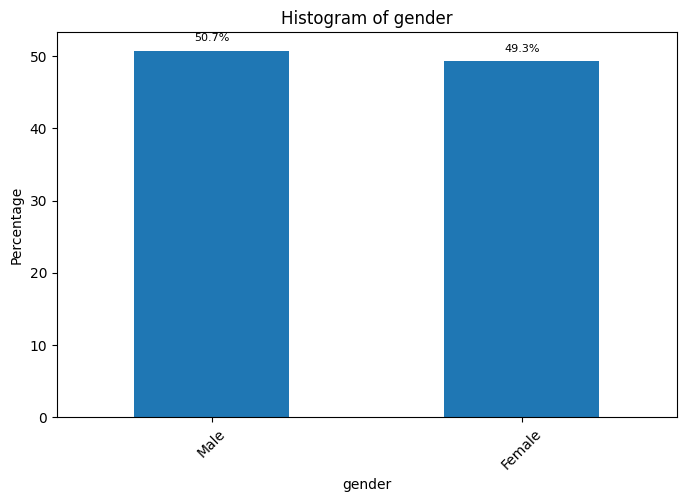

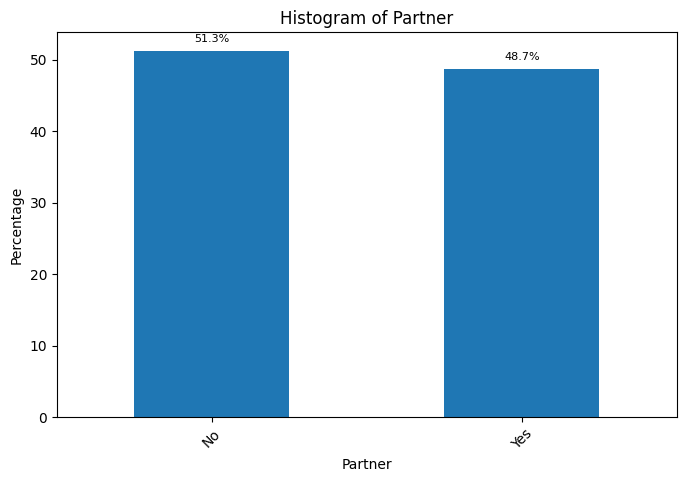

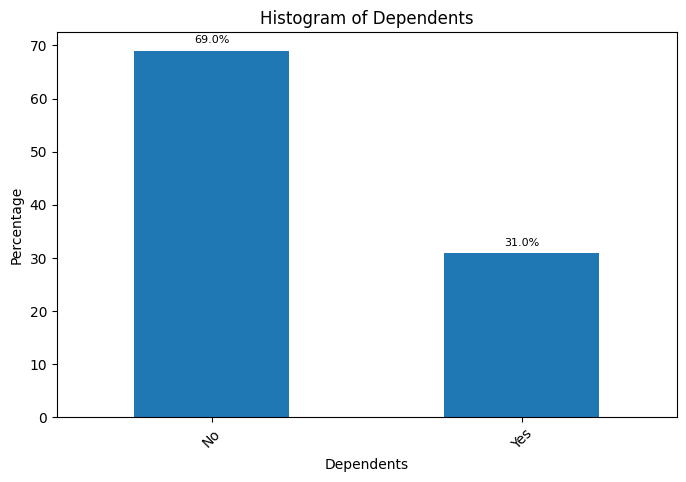

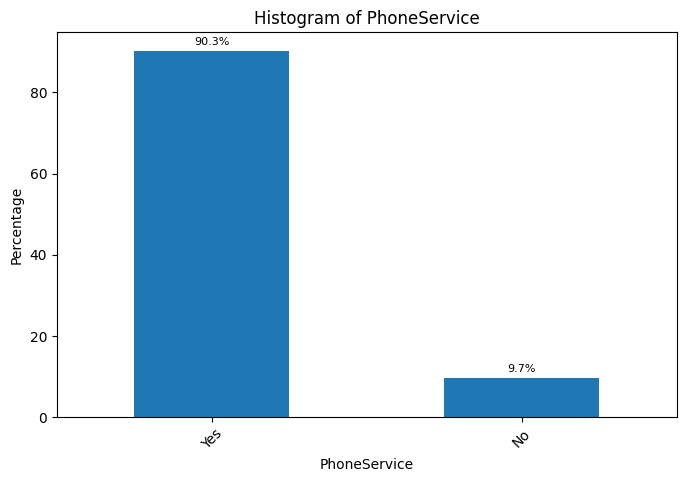

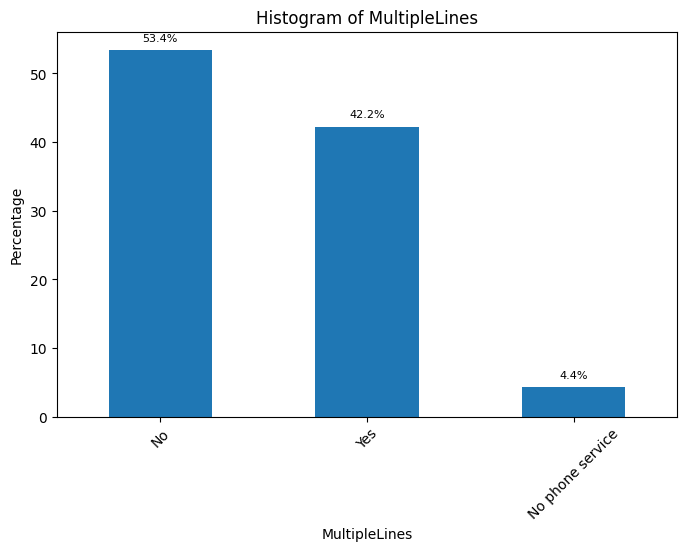

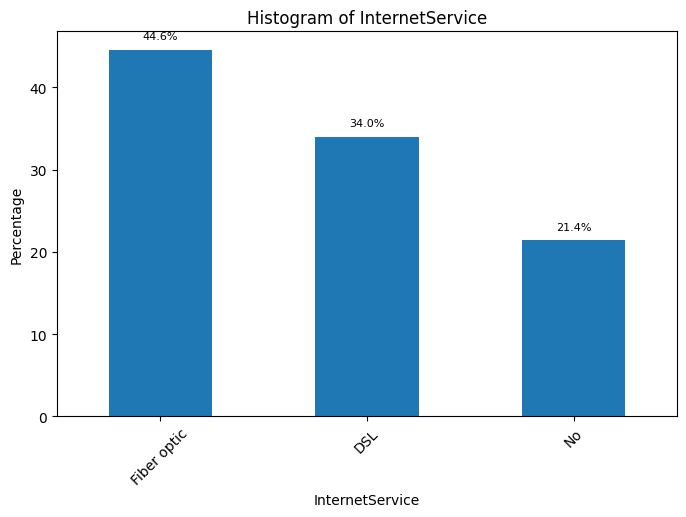

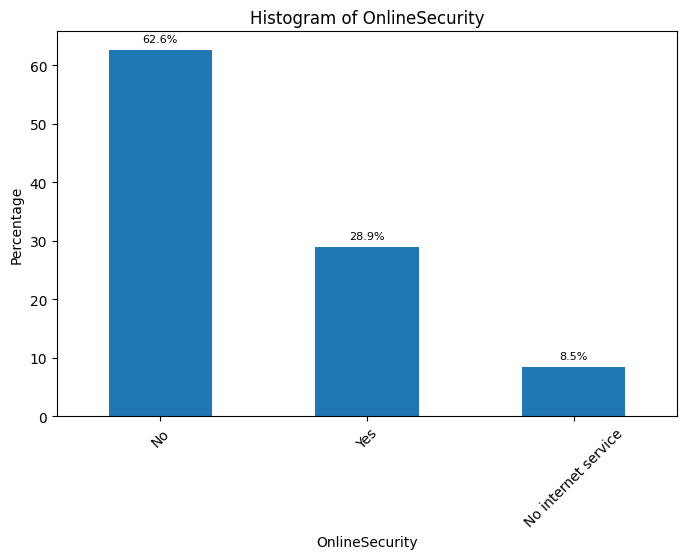

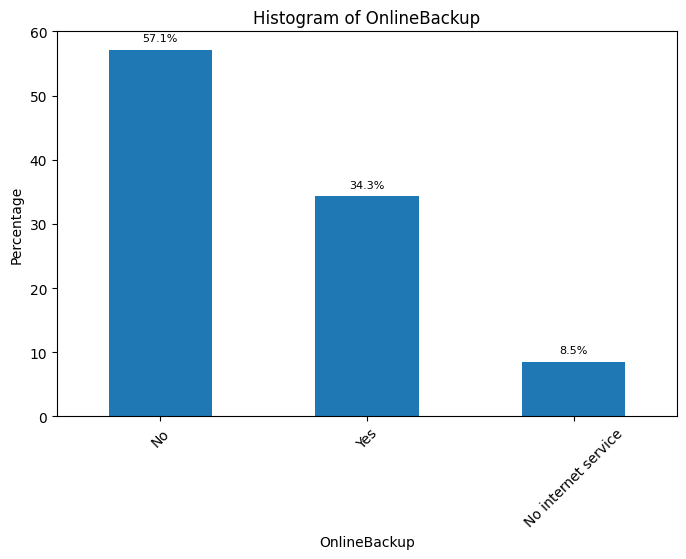

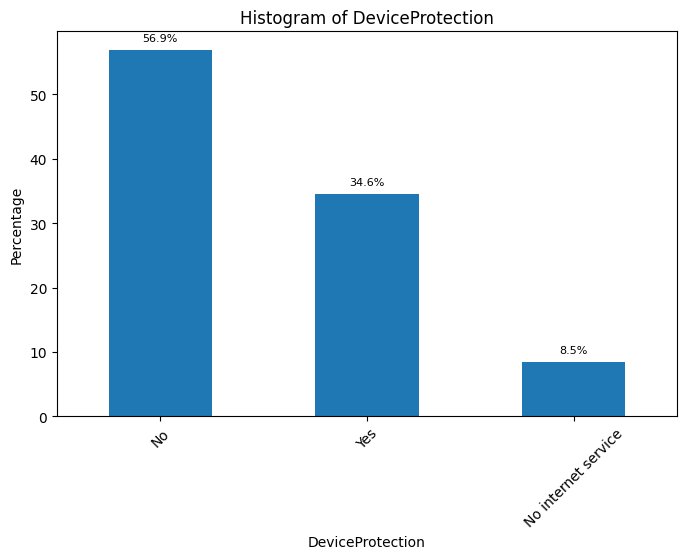

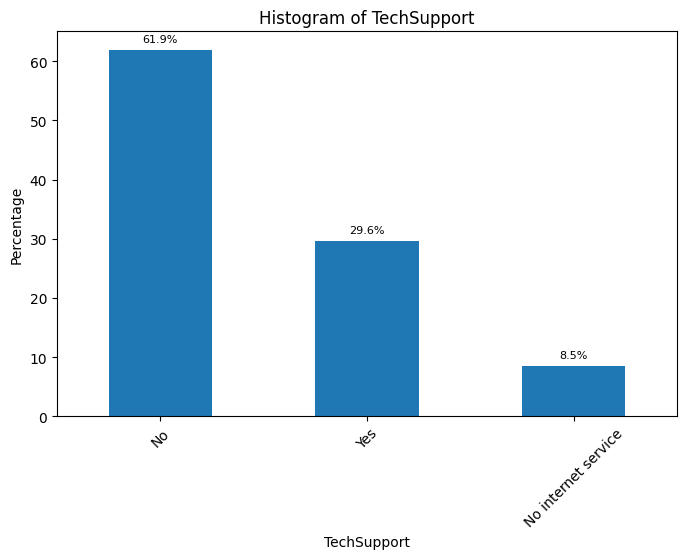

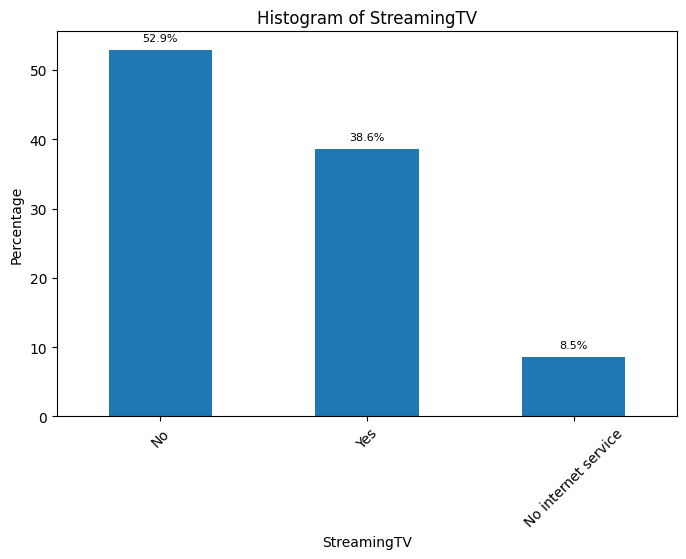

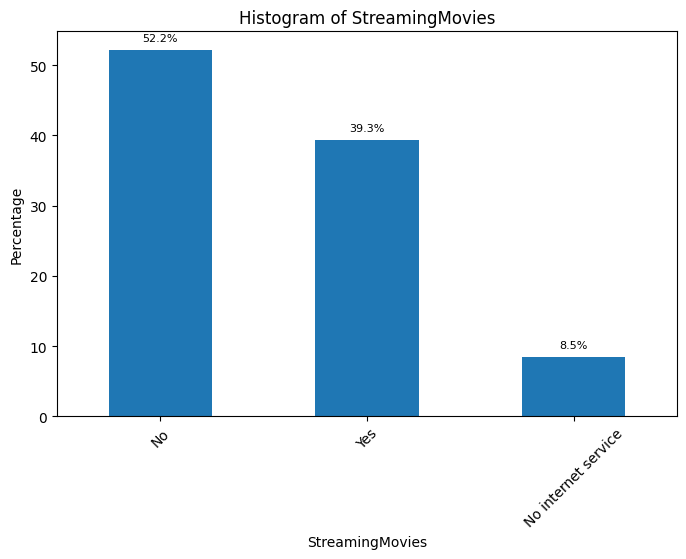

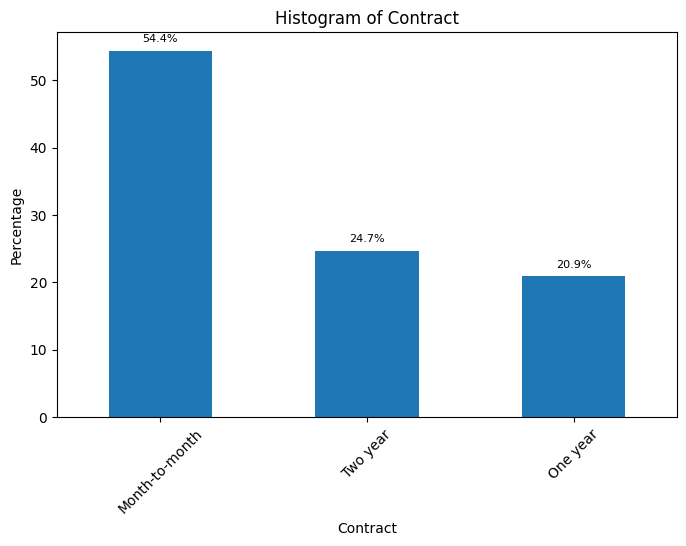

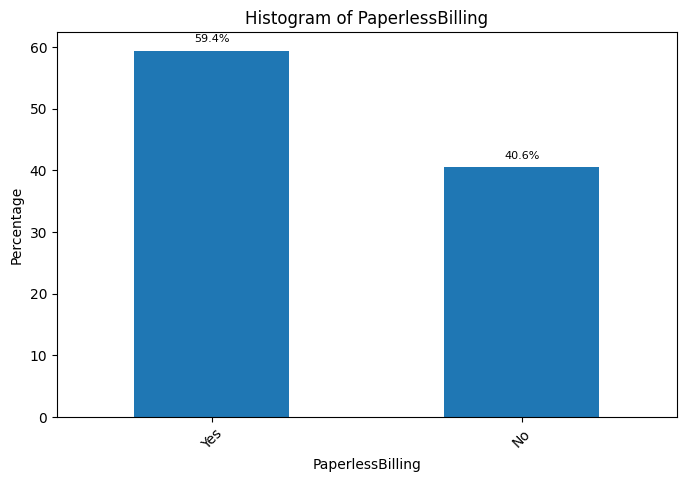

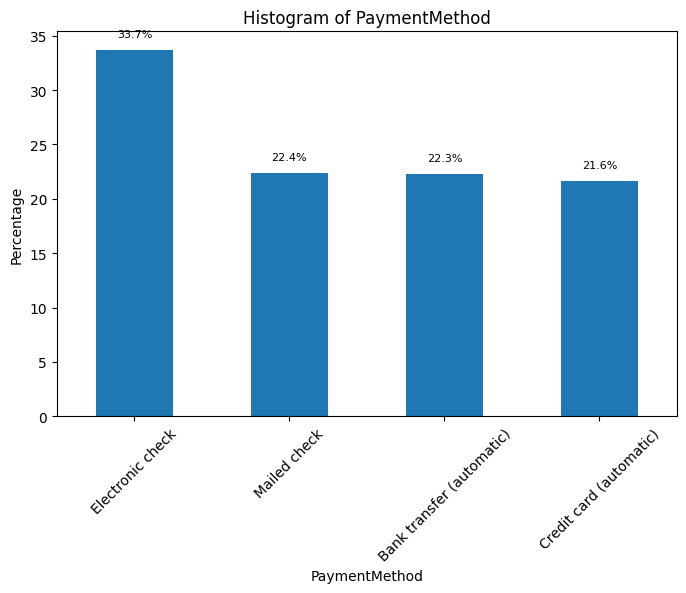

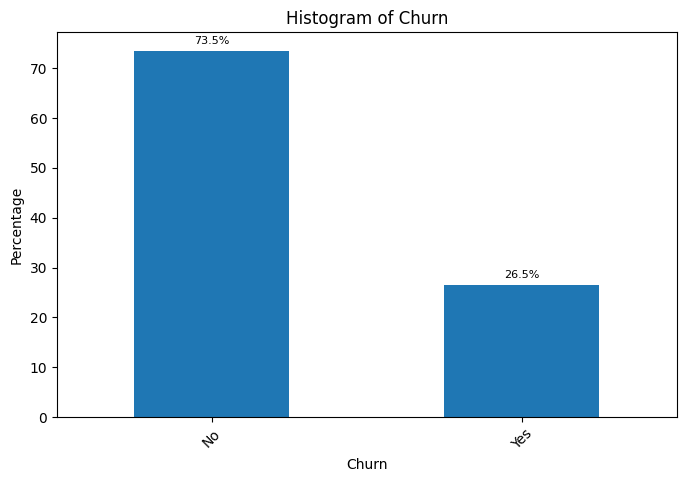

In [143]:
#Plot histograms for categorical columns 
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    
    # Calculate value counts and percentages
    counts = train_data[column].value_counts(normalize=True) * 100
    
    # Plotting
    counts.plot(kind='bar')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Percentage')
    plt.xticks(rotation=45)
    
    # Annotate with percentages
    for i, v in enumerate(counts):
        plt.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontsize=8)
    
    plt.show()


- Univariate analysis for numerical column 

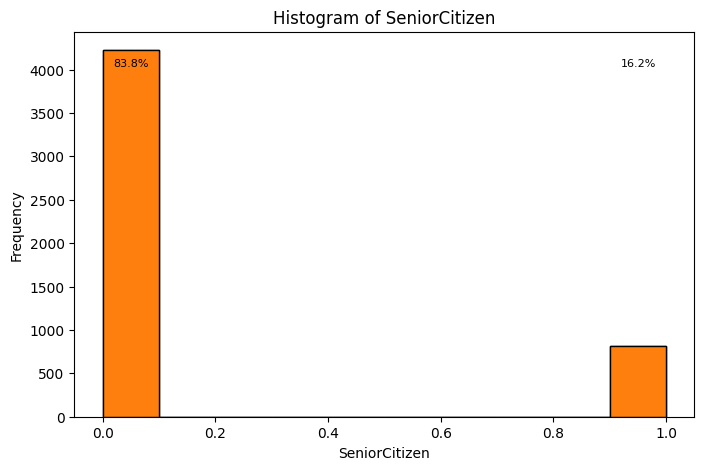

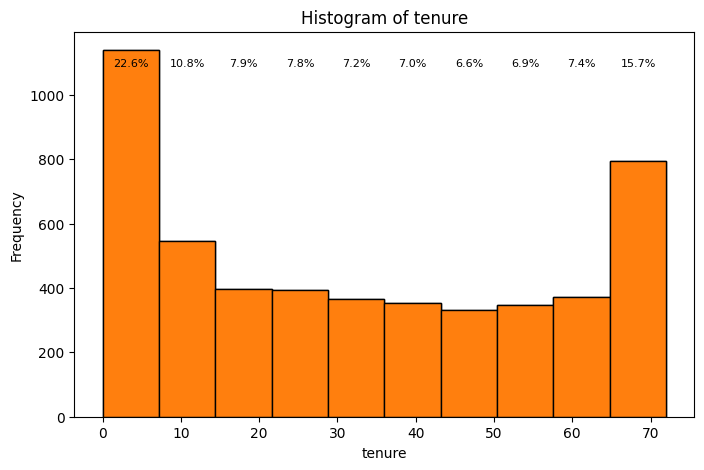

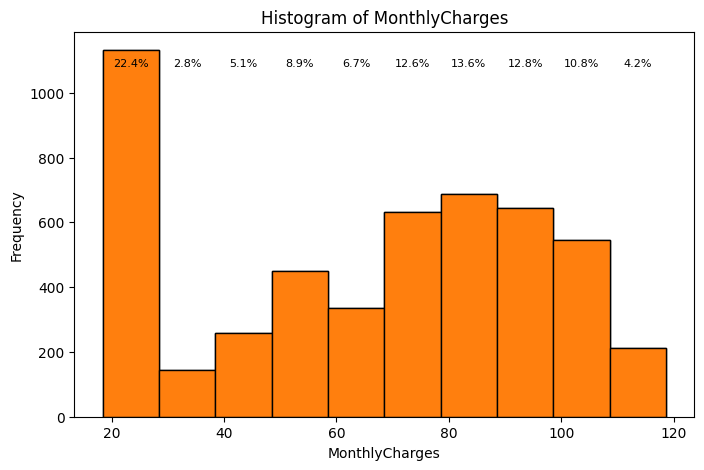

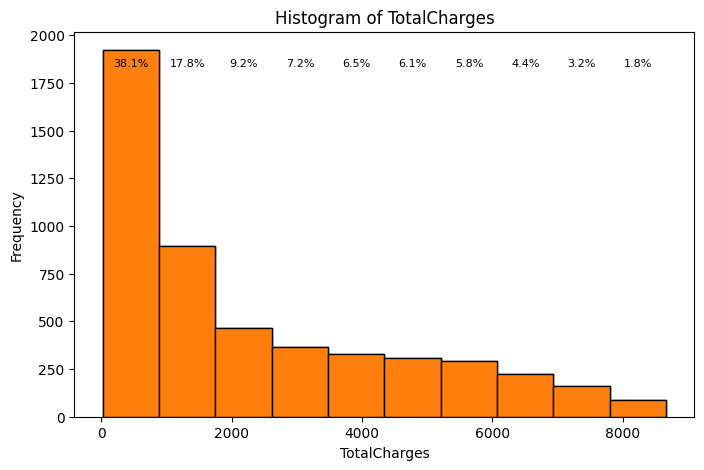

In [144]:
#Histogram distribution for numerical columns

numerical_columns = train_data.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms for numerical columns with percentage annotations
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    
    # Plotting histogram
    plt.hist(train_data[column], bins=10, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    # Calculate percentage values for each bin
    counts, bins, _ = plt.hist(train_data[column], bins=10, edgecolor='black')
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    percentages = [(count / len(train_data[column])) * 100 for count in counts]

    #show percentage annotations on values only
    for bin_center, percentage in zip(bin_centers, percentages):
        if percentage > 0.01:
            plt.text(bin_center, max(counts) * 0.95, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=8)
    
    plt.show()
    
   
    
    plt.show()


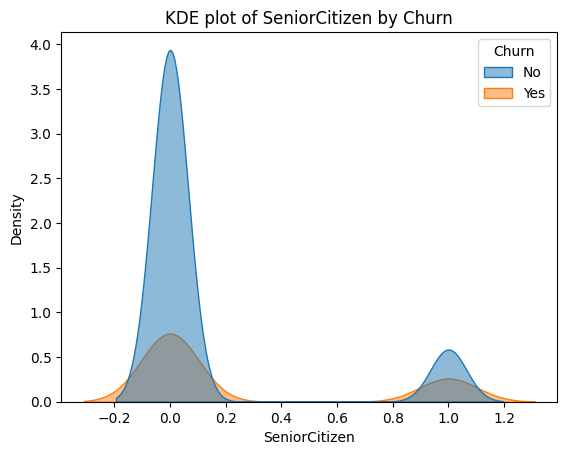

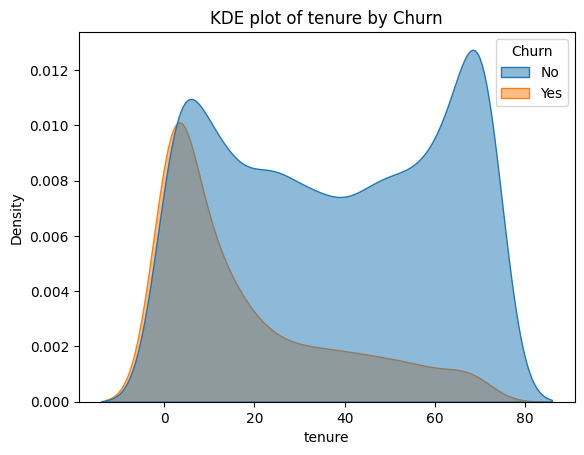

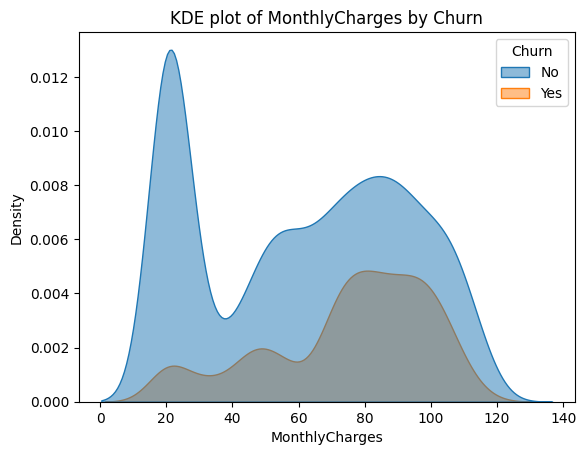

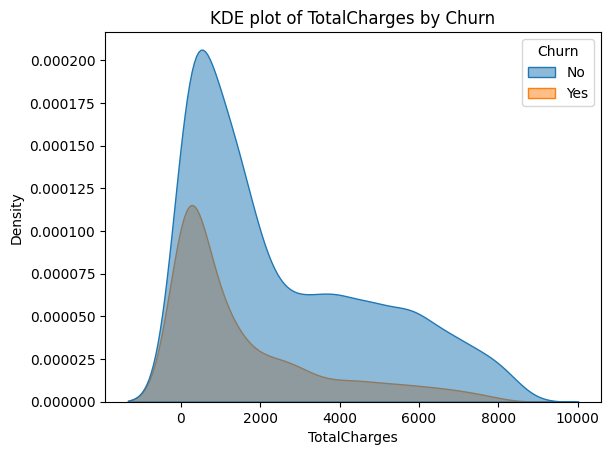

In [145]:
#Further analysing using kdeplot for numerical columns

for column in numerical_columns:
    sns.kdeplot(data=train_data, x=column, hue='Churn', fill=True, alpha=0.5)
    plt.title(f'KDE plot of {column} by Churn')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()
    

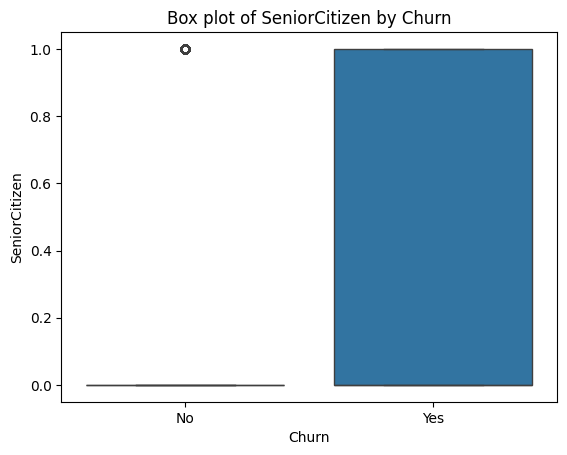

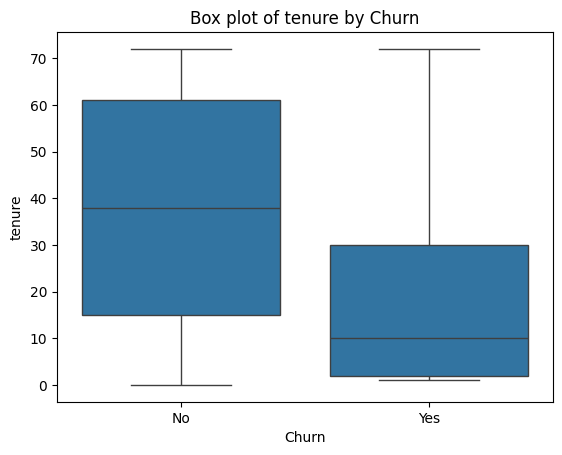

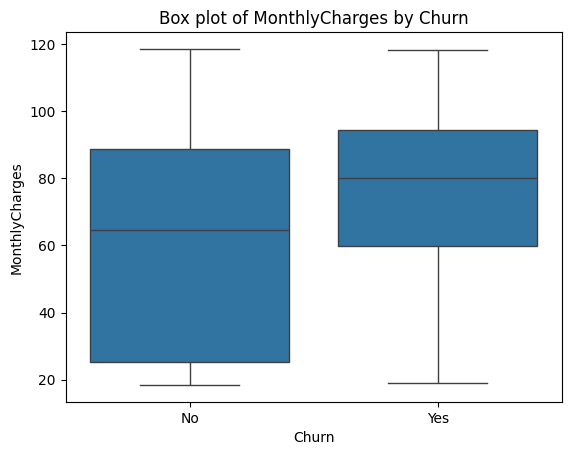

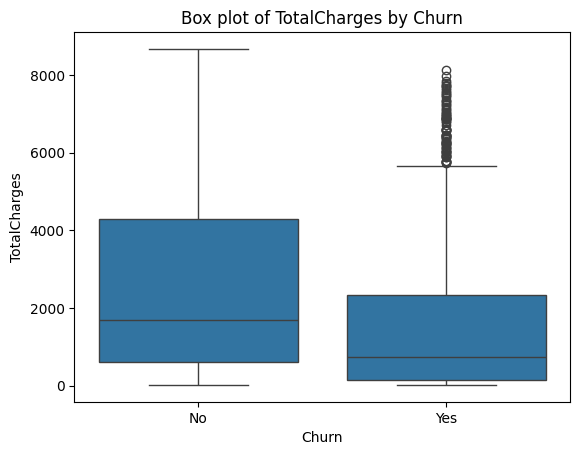

In [146]:
#Check for outliers in numerical columns using box plots

for column in numerical_columns:
    sns.boxplot(data=train_data, x='Churn', y=column)
    plt.title(f'Box plot of {column} by Churn')
    plt.xlabel('Churn')
    plt.ylabel(column)
    plt.show()
    

Univariate Analysis Insights 

- Customer Demographics: 
We can tell from the visualizations that most of the telco's customers are not senior citizens and that just about 16.2% are of the provided dataset. Also, there are more males than female customers which is a very good demography. 

- Churn Distribution: 
From the visualizations we understand that, that 73.5% of customers did not churn which is a good number compared to 26.5 who churned. 

- Payment Methods: 33.7% of customers prefer electronic check therefore managemet can be advised to focus o creating an experience through the usage of electronic check payment methods.

- Tenure: Average tenure is 32.5 months, with most customers having a tenure less than or equal to 30 months. Those who stayed with the company longer are more likely to not churn.

- Monthly Charges: Average monthly charge is $65.09, skewed to the right, with a range from $18.40 to $118.0

- Total Charges: Average total charge is $2302.06, ranging from $18.80 to $8684.80.

- From the box plots we identified that outliers are present in the TotalCharges and SeniorCitizen variables in your box plots


#### **Bivariate Analysis**

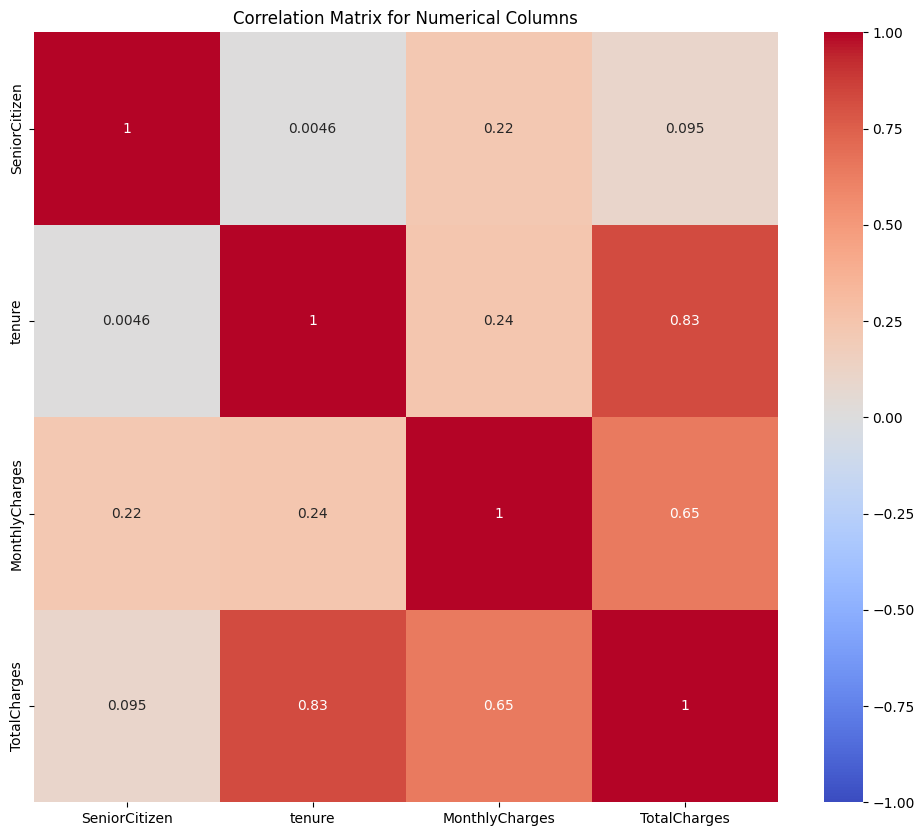

In [147]:
# Correlation matrix for numerical columns

correlation_matrix = train_data[numerical_columns].corr()

# Plotting correlation matrix using heatmap

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Numerical Columns')
plt.show()

Key Insights on Bivariate Analysis 

- SeniorCitizen has very low correlations with the other variables, suggets that senior citizen does not have a strong linear relationship with tenure, monthly charges, or total charges.

- tenure and TotalCharges have a high positive correlation 0.83 indicating that the longer a customer stays, the more they are likely to accumulate in total charges.

- MonthlyCharges and TotalCharges also show a moderate positive correlation (0.65), suggesting that higher monthly charges contribute significantly to the total charges.

- The correlation between tenure and MonthlyCharges is relatively low (0.24), indicating that tenure does not strongly influence the monthly charges a customer incurs.

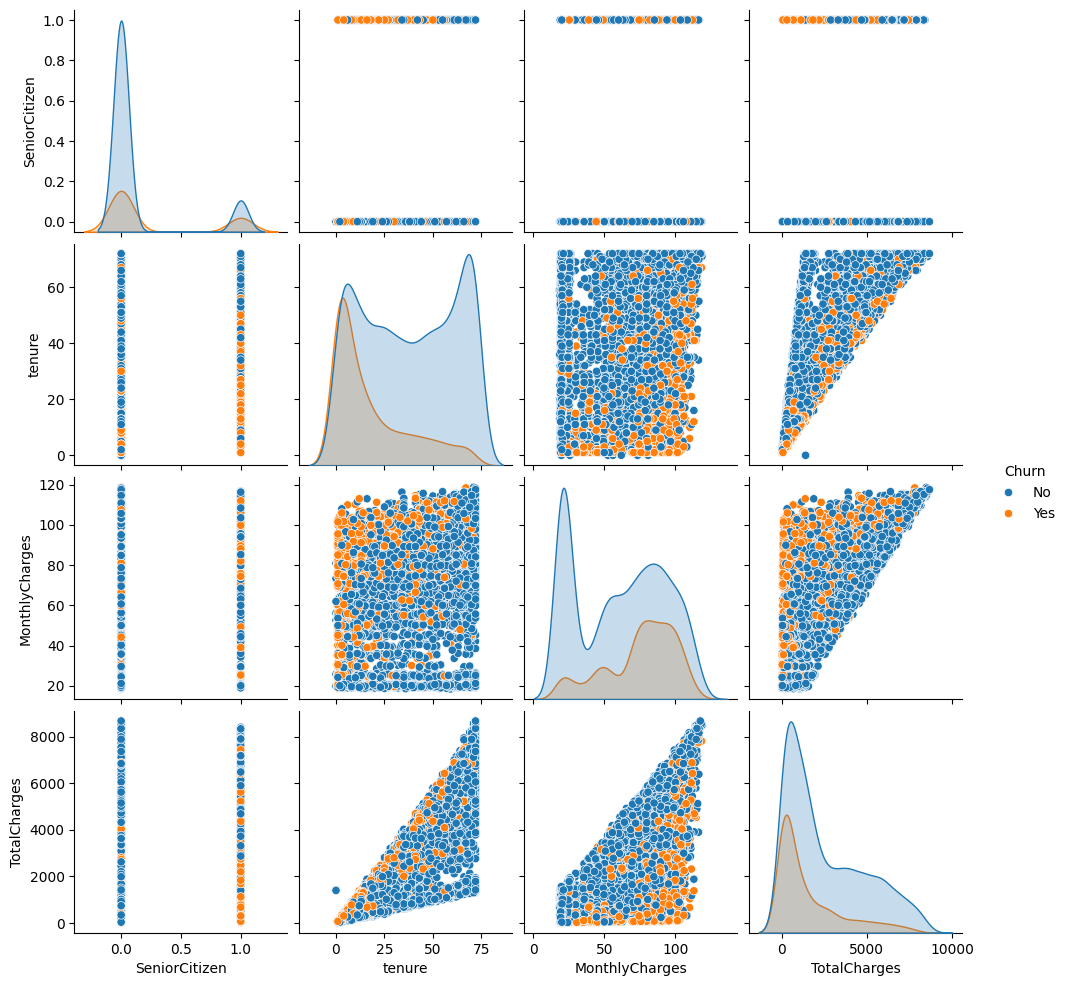

In [148]:
#Mulivariate analysis

sns.pairplot(train_data, hue='Churn', diag_kind='kde')
plt.title
plt.show()

Key insights from multivariate analysis

- Churn and Tenure:

  Customers with lower tenures are more likely to churn.

- Churn and Monthly Charges 

  Customers with higher monthly charges show higher churn rates. High monthly charges might be perceived as less valuable or too expensive, leading to higher churn. Consider reviewing pricing strategies or offering more value to justify higher costs to retain these customers.

- Churn and Total Charges:

  Customers with lower total charges are more likely to churn, likely due to their shorter tenure.

- Senior Citizen and Churn:
There is a slight increase in churn among senior citizens, but this is less pronounced compared to tenure and monthly charges.

- Correlation between Tenure and Total Charges:

  There is a positive correlation between tenure and total charges.This is expected, as longer-tenured customers accumulate more charges over time. Retention efforts should focus on maintaining and increasing tenure.

- Distribution Observations:
The distribution of total charges is right-skewed, with a majority of customers having lower total charges. Monthly charges are relatively uniformly distributed with some peaks.The skewness in total charges indicates that while many customers have lower total charges, a significant minority have much higher charges, likely due to longer tenure or higher monthly fees. Understanding the characteristics of high-value customers could help in creating strategies to replicate their satisfaction and retention.










#### Answering Analytical Questions

I. What is the overall churn rate against contract types (Month-to-month, One-year, Two-year)?



In [149]:
# Calculate churn counts for each contract type
churn_counts_by_contract = train_data.groupby('Contract')['Churn'].value_counts().unstack().fillna(0)
print("Churn Counts by Contract Type:\n", churn_counts_by_contract)
print("=" * 50)

# Calculate total counts for each contract type
contract_type_counts = train_data['Contract'].value_counts()

# Calculate churn rate for each contract type
churn_rate_by_contract = (churn_counts_by_contract['Yes'] / contract_type_counts) * 100
print("Churn Rate by Contract Type:\n", churn_rate_by_contract)


Churn Counts by Contract Type:
 Churn             No   Yes
Contract                  
Month-to-month  1560  1184
One year         933   122
Two year        1214    30
Churn Rate by Contract Type:
 Contract
Month-to-month    43.148688
One year          11.563981
Two year           2.411576
dtype: float64


II. What are the key demographic and behavioral characteristics of customers who churn compared to those who stay, and how do these  characteristics vary across different customer segments?


Cross-Tabulation of Churn_Category vs gender:
Churn_Category      Churn       Stay
gender                              
Female          26.610306  73.389694
Male            26.377491  73.622509


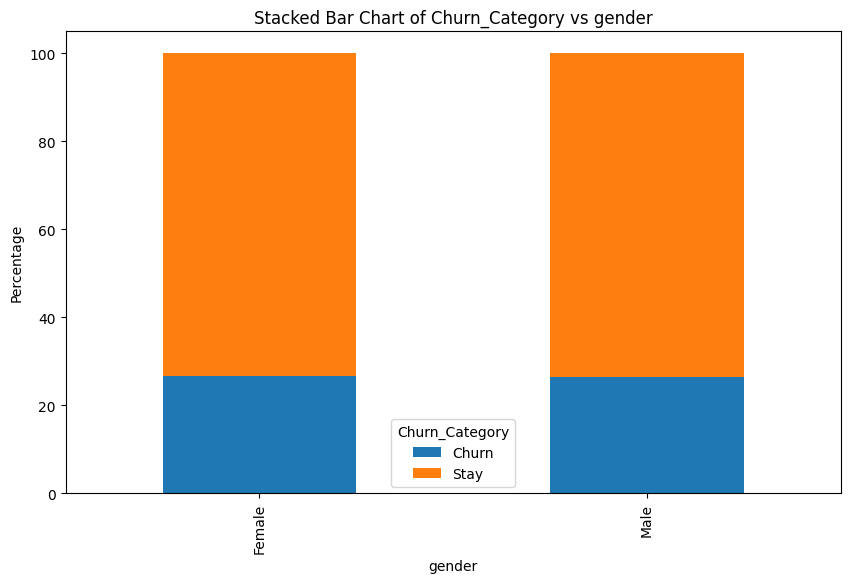

Cross-Tabulation of Churn_Category vs Partner:
Churn_Category      Churn       Stay
Partner                             
No              32.572534  67.427466
Yes             20.097640  79.902360


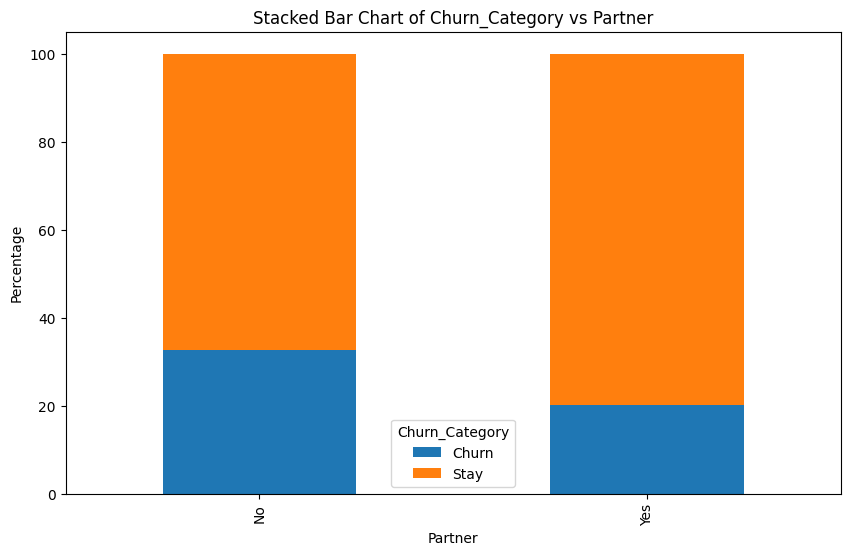

Cross-Tabulation of Churn_Category vs Dependents:
Churn_Category      Churn       Stay
Dependents                          
No              31.562321  68.437679
Yes             15.182575  84.817425


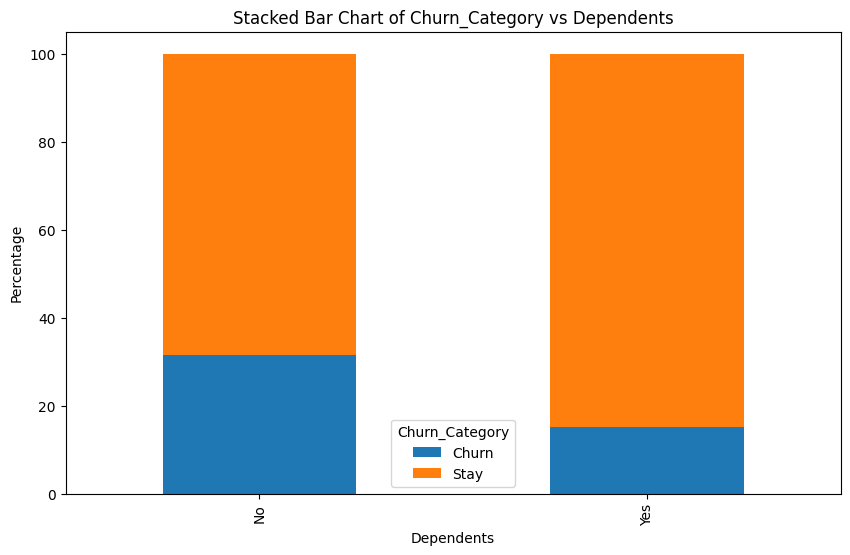

Cross-Tabulation of Churn_Category vs PhoneService:
Churn_Category      Churn       Stay
PhoneService                        
No              24.539877  75.460123
Yes             26.701801  73.298199


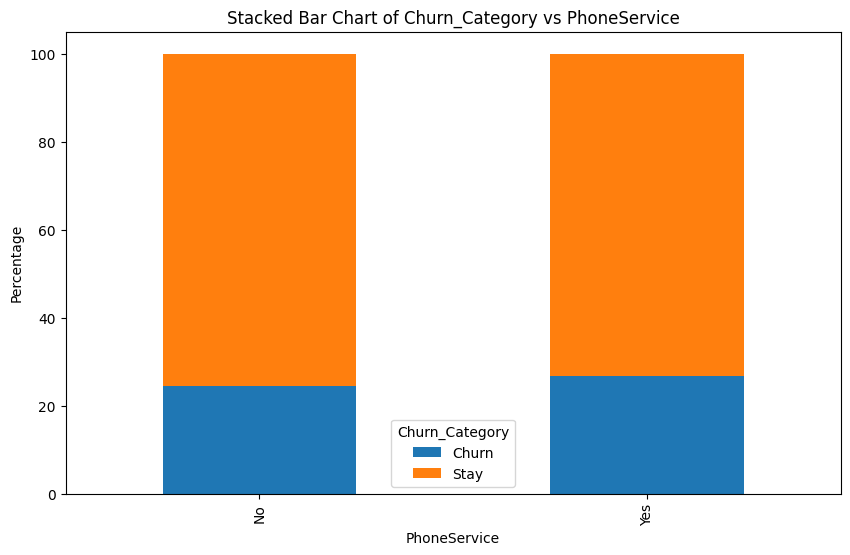

Cross-Tabulation of Churn_Category vs MultipleLines:
Churn_Category        Churn       Stay
MultipleLines                         
No                24.953583  75.046417
No phone service  25.000000  75.000000
Yes               28.591549  71.408451


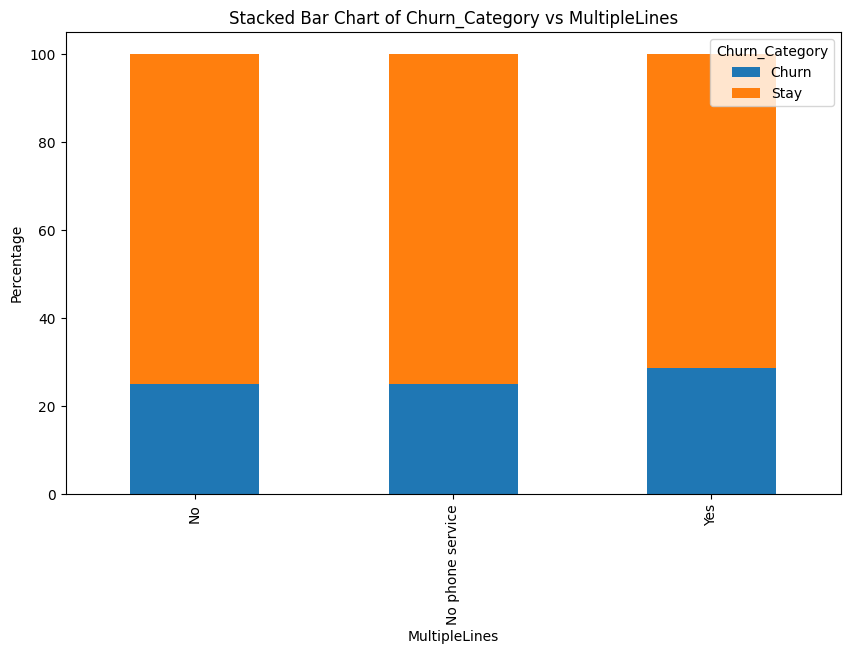

Cross-Tabulation of Churn_Category vs InternetService:
Churn_Category       Churn       Stay
InternetService                      
DSL              18.017493  81.982507
Fiber optic      42.304270  57.695730
No                7.037037  92.962963


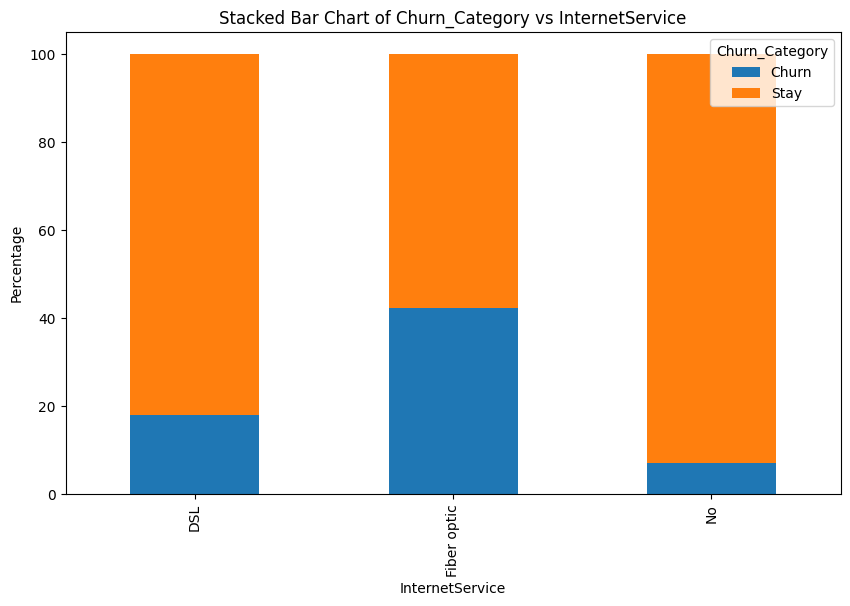

Cross-Tabulation of Churn_Category vs OnlineSecurity:
Churn_Category           Churn       Stay
OnlineSecurity                           
No                   34.357188  65.642812
No internet service   8.624709  91.375291
Yes                  14.697802  85.302198


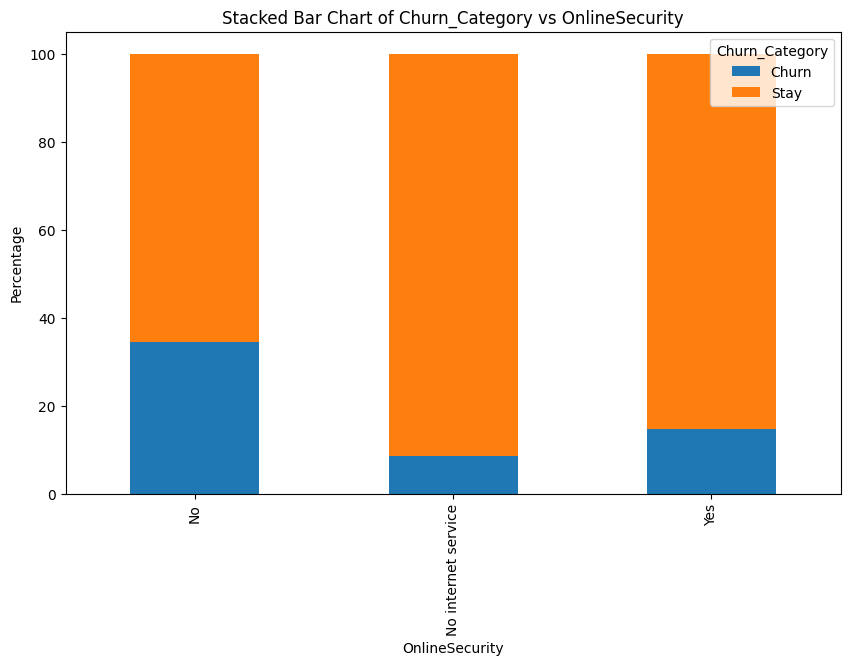

Cross-Tabulation of Churn_Category vs OnlineBackup:
Churn_Category           Churn       Stay
OnlineBackup                             
No                   32.269257  67.730743
No internet service   8.624709  91.375291
Yes                  21.304850  78.695150


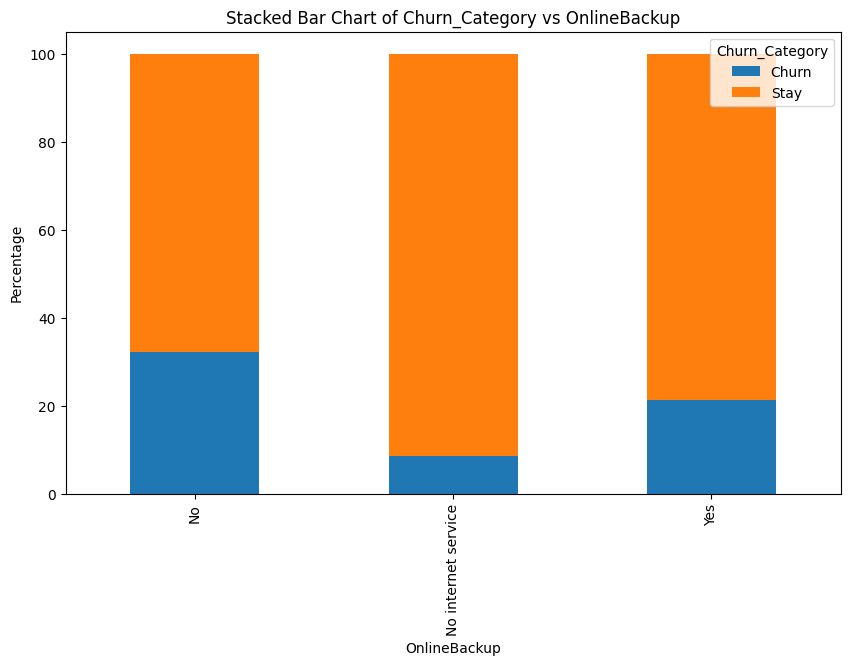

Cross-Tabulation of Churn_Category vs DeviceProtection:
Churn_Category           Churn       Stay
DeviceProtection                         
No                   31.567944  68.432056
No internet service   8.624709  91.375291
Yes                  22.534404  77.465596


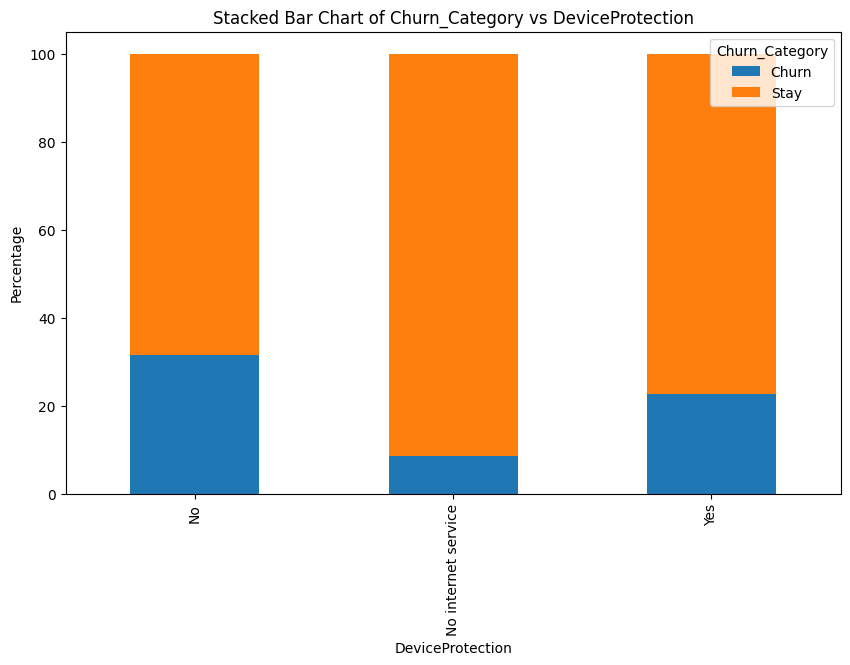

Cross-Tabulation of Churn_Category vs TechSupport:
Churn_Category           Churn       Stay
TechSupport                              
No                   34.518092  65.481908
No internet service   8.624709  91.375291
Yes                  14.822267  85.177733


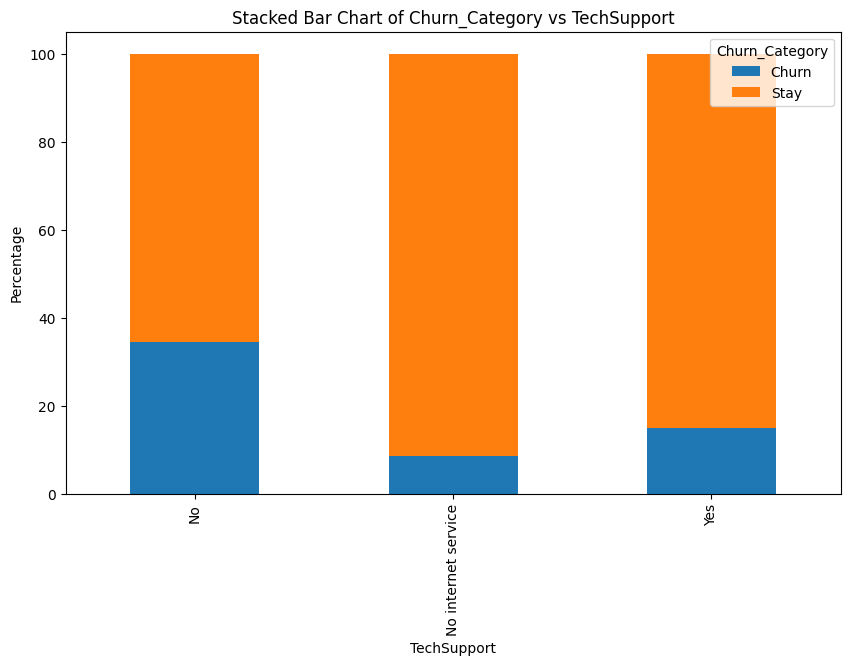

Cross-Tabulation of Churn_Category vs StreamingTV:
Churn_Category           Churn       Stay
StreamingTV                              
No                   26.751592  73.248408
No internet service   8.624709  91.375291
Yes                  30.077121  69.922879


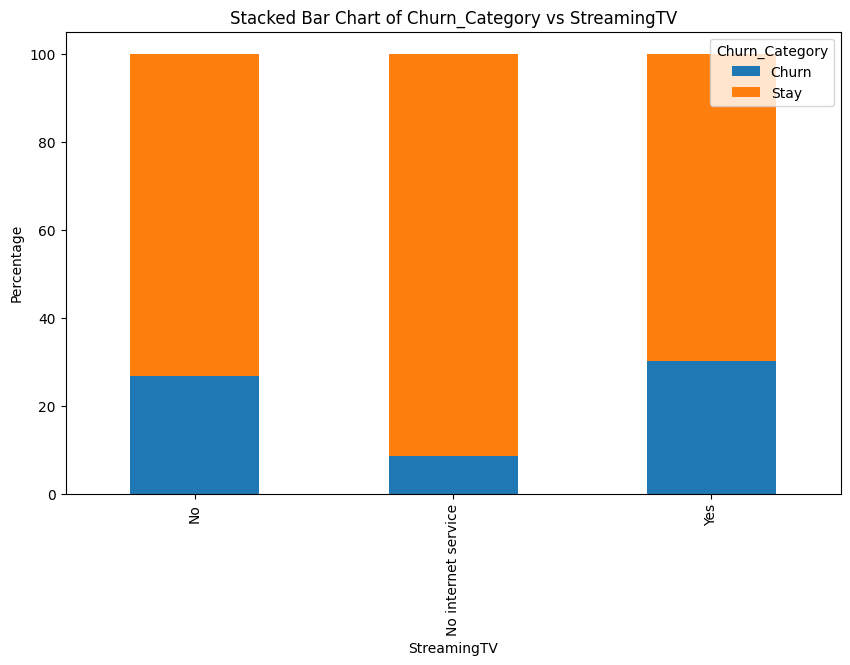

Cross-Tabulation of Churn_Category vs StreamingMovies:
Churn_Category           Churn       Stay
StreamingMovies                          
No                   26.329787  73.670213
No internet service   8.624709  91.375291
Yes                  30.575177  69.424823


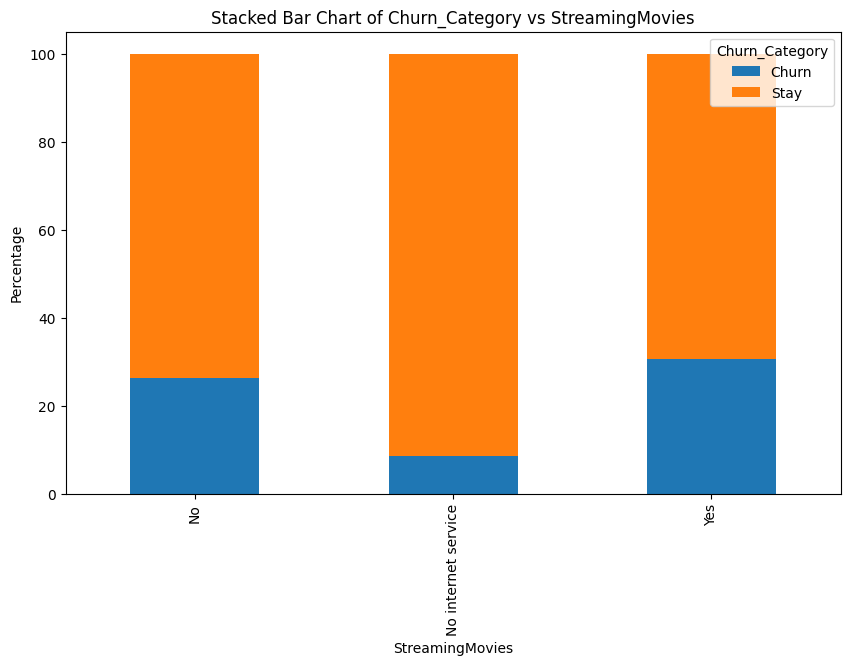

Cross-Tabulation of Churn_Category vs Contract:
Churn_Category      Churn       Stay
Contract                            
Month-to-month  43.148688  56.851312
One year        11.563981  88.436019
Two year         2.411576  97.588424


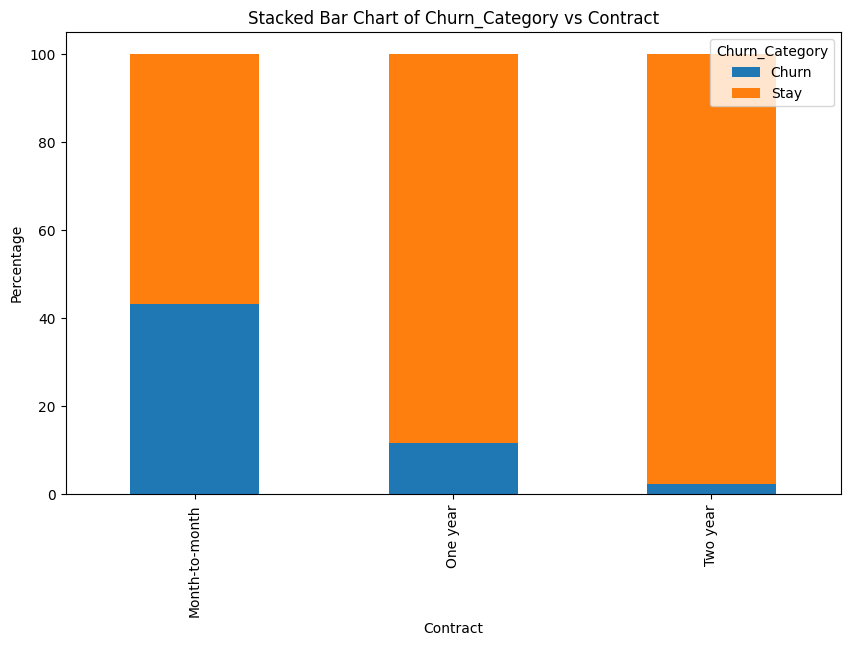

Cross-Tabulation of Churn_Category vs PaperlessBilling:
Churn_Category        Churn       Stay
PaperlessBilling                      
No                16.170005  83.829995
Yes               33.544726  66.455274


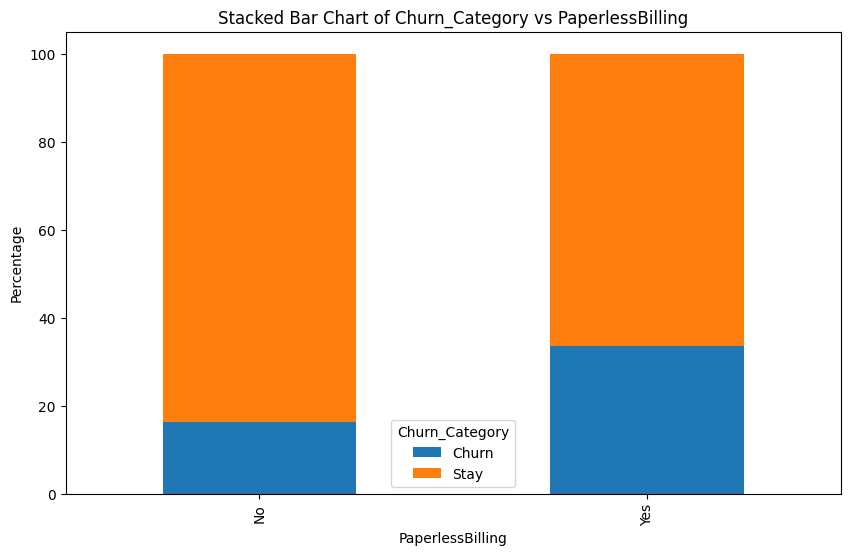

Cross-Tabulation of Churn_Category vs PaymentMethod:
Churn_Category                 Churn       Stay
PaymentMethod                                  
Bank transfer (automatic)  17.600000  82.400000
Credit card (automatic)    15.412844  84.587156
Electronic check           44.588235  55.411765
Mailed check               18.794326  81.205674


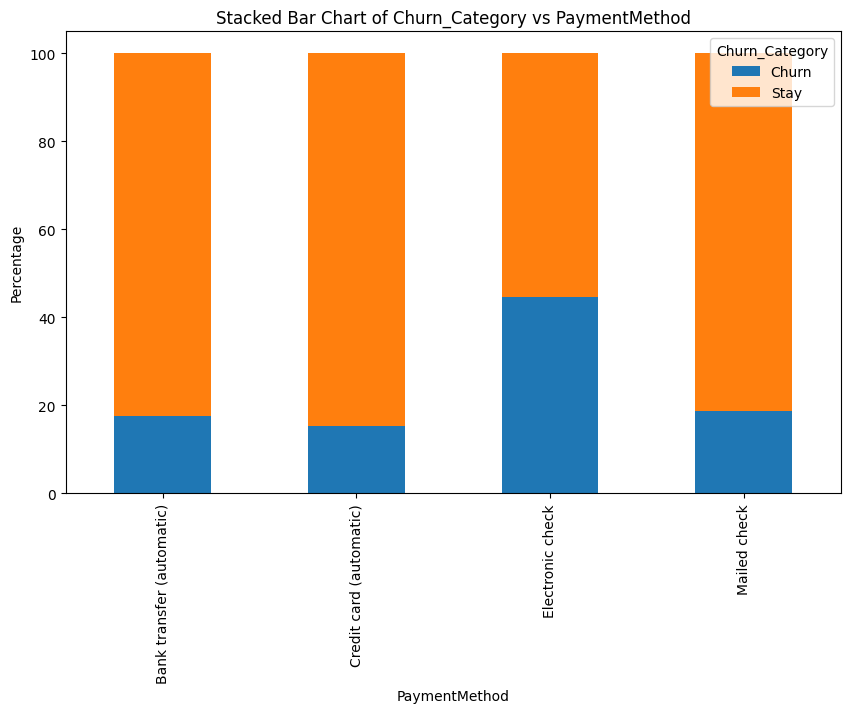

Cross-Tabulation of Churn_Category vs Churn:
Churn_Category  Churn   Stay
Churn                       
No                0.0  100.0
Yes             100.0    0.0


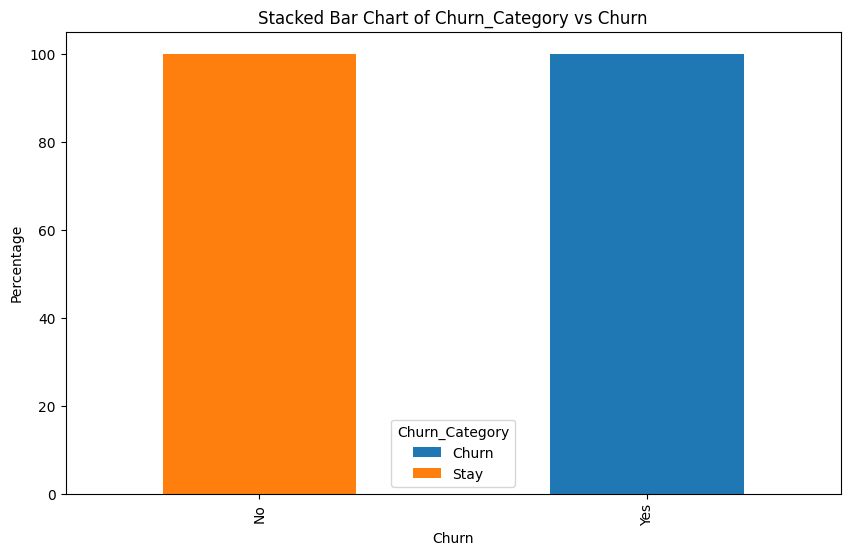

In [150]:
# Key demographic and behavioral characteristics of customers who churn compared to those who stay

train_data['Churn_Category'] = train_data['Churn'].map({'Yes': 'Churn', 'No': 'Stay'})

# Perform bivariate analysis between 'Churn_Category' and other categorical columns
for column in categorical_columns:
    cross_tab = pd.crosstab(train_data[column], train_data['Churn_Category'], normalize='index') * 100
    print(f"Cross-Tabulation of Churn_Category vs {column}:")
    print(cross_tab)
    print("=" * 50)
    
    # Plotting a stacked bar chart to visualize the relationship
    cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Stacked Bar Chart of Churn_Category vs {column}')
    plt.xlabel(column)
    plt.ylabel('Percentage')
    plt.legend(title='Churn_Category')
    plt.show()


III. Which factors have the highest influence on customer churn and how do they interact with each other?

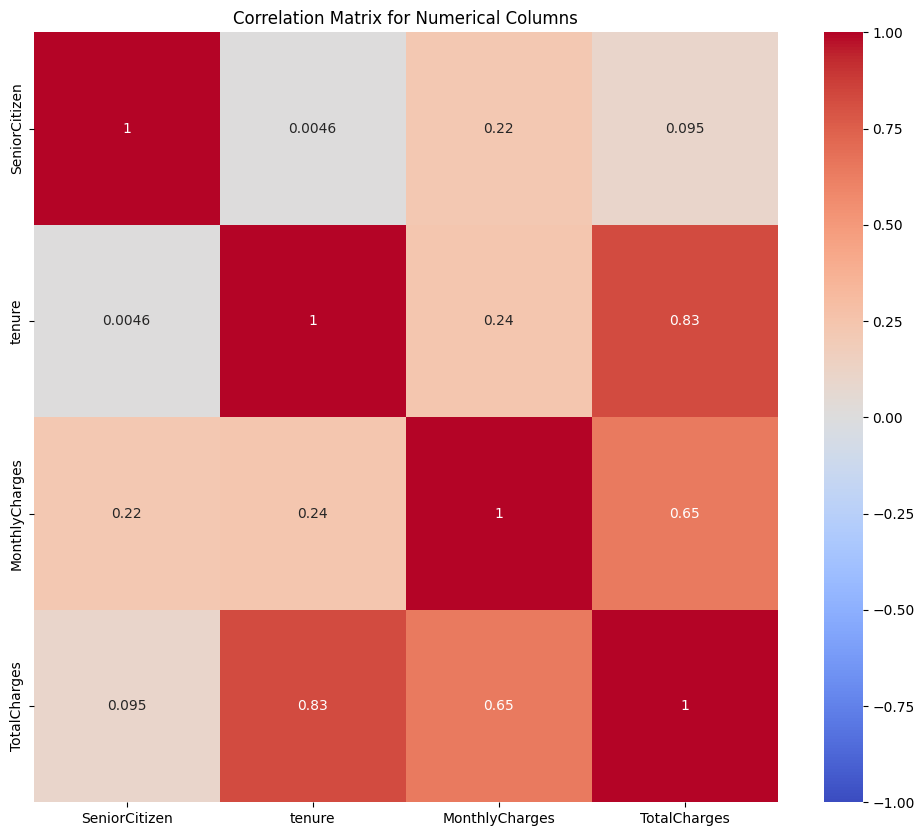

In [151]:

# factors that have the highest influence on customer churn and how do they interact with each other

# correlation matrix for numerical columns

correlation_matrix = train_data[numerical_columns].corr()

# Plotting correlation matrix using heatmap

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Numerical Columns')
plt.show()



IV. How does the length of time a customer has been with the company (tenure) impact their likelihood of churning? Are newer customers more likely to churn than long-term customers

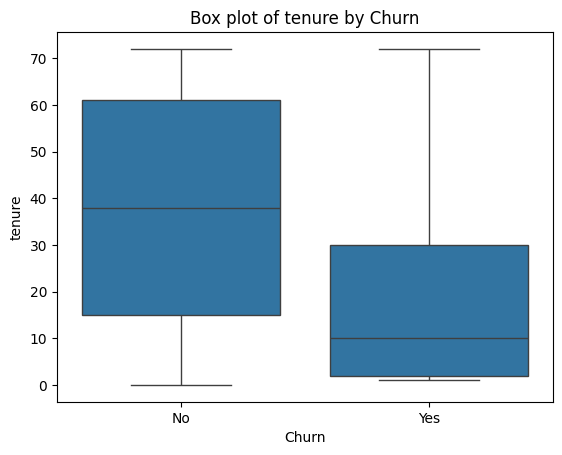

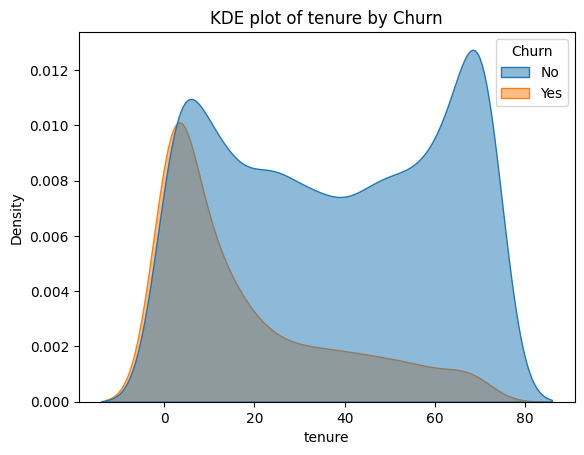

In [152]:
#how does the length of time a customer has been with the company (tenure) impact their likelihood of churning? Are newer customers more likely to churn than long-term customers

#length of time a customer has been with the company (tenure) impact their likelihood of churning

sns.boxplot(data=train_data, x='Churn', y='tenure')
plt.title('Box plot of tenure by Churn')
plt.xlabel('Churn')
plt.ylabel('tenure')
plt.show()

# Are newer customers more likely to churn than long-term customers

sns.kdeplot(data=train_data, x='tenure', hue='Churn', fill=True, alpha=0.5)
plt.title('KDE plot of tenure by Churn')
plt.xlabel('tenure')
plt.ylabel('Density')
plt.show()


V. Does the type of internet service influence customer churn?

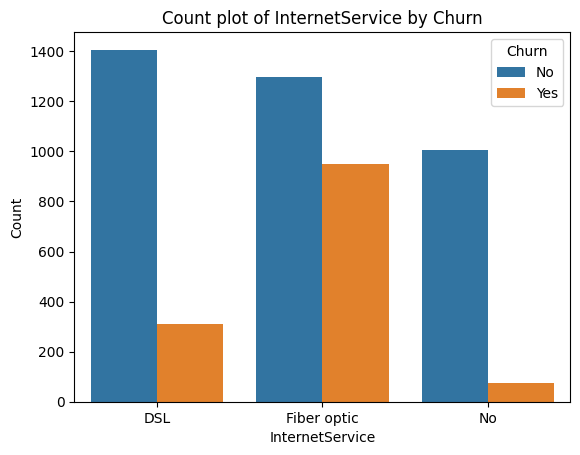

In [153]:
#Does the type of internet service influence customer churn?

sns.countplot(data=train_data, x='InternetService', hue='Churn')
plt.title('Count plot of InternetService by Churn')
plt.xlabel('InternetService')
plt.ylabel('Count')
plt.legend(title='Churn')

plt.show()

#### **Hypothesis Testing**

- Null Hypothesis (Ho):There is a no significant relationship between the total amount charged to a customer and their likelihood of churning.
    
- Alternative Hypothesis (H1):- There is a significant relationship between the total amount charged to a customer and their likelihood of churning


In [154]:
from scipy.stats import mannwhitneyu


# Separate the data into two groups based on the 'Churn' column
churn_yes = train_data[train_data['Churn'] == 'Yes']['TotalCharges']
churn_no = train_data[train_data['Churn'] == 'No']['TotalCharges']

# Perform the Mann-Whitney U test
stat, p_value = mannwhitneyu(churn_yes, churn_no)

print(f'Mann-Whitney U test statistic: {stat}')
print(f'p-value: {p_value}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis (Ho). There is a significant relationship between TotalCharges and Churn.")
else:
    print("Fail to reject the null hypothesis (Ho). There is no significant relationship between TotalCharges and Churn.")



Mann-Whitney U test statistic: 1739051.0
p-value: 9.970211412915064e-59
Reject the null hypothesis (Ho). There is a significant relationship between TotalCharges and Churn.


- General insights:

1. The dataset reveals critical insights into customer demographics, behavior, and churn patterns in the telecommunications industry. A notable demographic finding is that the majority of customers are not senior citizens, comprising only 16.2% of the dataset. The gender distribution shows a slight predominance of male customers, indicating a balanced demographic that the company serves.

2. Churn analysis indicates that 73.5% of customers did not churn, whereas 26.5% did, emphasizing the need for targeted retention strategies. Payment preferences highlight that 33.7% of customers favor electronic check payments, suggesting an area where the company could enhance customer experience to boost satisfaction and retention.

3. Customer tenure analysis shows an average of 32.5 months, with a significant portion of customers having a tenure of 30 months or less, who are more likely to churn. This points to the importance of implementing early engagement and retention programs. The average monthly charge stands at $65.09, with a broad range from $18.40 to $118.0, indicating diverse customer billing profiles. Total charges average $2302.06, ranging from $18.80 to $8684.80, reflecting the cumulative spending over the customers' lifetimes.

4. Correlational analysis reveals that tenure and total charges have a strong positive correlation (0.83), suggesting that customers who stay longer tend to accumulate higher charges. Monthly charges and total charges also show a moderate positive correlation (0.65), indicating that higher monthly charges contribute significantly to the total charges. However, the correlation between tenure and monthly charges is relatively low (0.24), implying that tenure does not strongly influence the monthly charges incurred by customers.

5. Multivariate analysis highlights that customers with lower tenures and higher monthly charges are more likely to churn. This suggests a need to review pricing strategies or offer additional value to justify higher costs, thereby retaining these customers. Additionally, while senior citizens show a slight increase in churn, this is less pronounced compared to the impact of tenure and monthly charges.

6. Overall, the data underscores the importance of focusing on customer retention strategies, particularly for those with lower tenure and higher monthly charges. Enhancing payment experiences, especially for electronic check users, and understanding high-value customers' characteristics can help replicate their satisfaction and retention across the broader customer base. By addressing these insights, the telecommunications company can develop targeted strategies to reduce churn and enhance overall customer satisfaction and loyalty.








### **Data Preparation**

Split data into x and y 

In [158]:
#check overview of columns for train data

train_data.head(2)



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Category
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.85,No,Stay
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.950001,1889.50,No,Stay


In [159]:
#Split data into x and y
x = train_data.drop(['Churn', 'Churn_Category'], axis=1)
y = train_data['Churn']

x.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.50


In [160]:
#check for uniqeue values in y
y.unique()

array(['No', 'Yes'], dtype=object)

In [162]:
#check for all columns in x

x.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

#### Split the data into categorical and numeric features 

In [163]:
#numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
numerical_columns = x.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [164]:
categorical_columns = x.select_dtypes(include=['object']).columns

categorical_columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')